In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from datasets import Dataset
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [39]:
# Load the dataset
df1 = pd.read_csv('../NLP/Data/lyrics-data.csv')

In [40]:
df1 = df1[df1['language'] == 'en']

In [41]:
df2 = pd.read_csv('../NLP/Data/artists-data.csv')

In [42]:
df1.count()

ALink       191814
SName       191812
SLink       191814
Lyric       191814
language    191814
dtype: int64

In [43]:
df = df1[:500]
lyrics = df['Lyric'].tolist()
dataset = Dataset.from_dict({'text': lyrics})

In [44]:
df

,ALink,SName,SLink,Lyric,language
69,/ivete-sangalo/,Careless Whisper,/ivete-sangalo/careless-whisper.html,I feel so unsure\nAs I take your hand and lead...,en
86,/ivete-sangalo/,Could You Be Loved / Citação Musical do Rap: S...,/ivete-sangalo/could-you-be-loved-citacao-musi...,"Don't let them fool, ya\nOr even try to school...",en
88,/ivete-sangalo/,Cruisin' (Part. Saulo),/ivete-sangalo/cruisin-part-saulo.html,"Baby, let's cruise, away from here\nDon't be c...",en
111,/ivete-sangalo/,Easy,/ivete-sangalo/easy.html,"Know it sounds funny\nBut, I just can't stand ...",en
140,/ivete-sangalo/,For Your Babies (The Voice cover),/ivete-sangalo/for-your-babies-the-voice-cover...,You've got that look again\nThe one I hoped I ...,en
...,...,...,...,...,...
5226,/rihanna/,Desperado,/rihanna/desperado.html,Desperado\nSitting in an old Monte Carlo\nA ma...,en
5227,/rihanna/,Diamonds (Dave Aude 100 Radio Edit),/rihanna/diamonds-dave-aude-100-radio-edit.html,Shine bright like a diamond\nShine bright like...,en
5228,/rihanna/,Diamonds (Feat. Eve) (Remix),/rihanna/diamonds-feat-eve-remix.html,Shine bright like a diamond\n(C'mon)\nShine br...,en
5229,/rihanna/,Diamonds (Remix) (Feat. Kanye West),/rihanna/diamonds-remix-feat-kanye-west.html,[Kanye West]\nWe the cause of all commotion\nY...,en


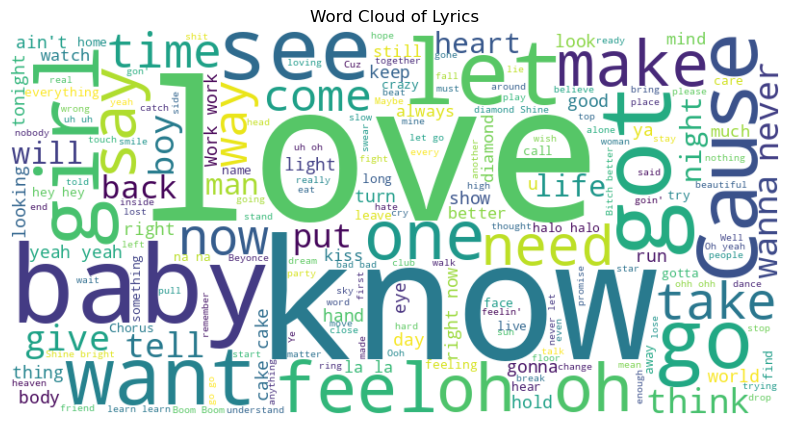

In [48]:
all_lyrics = ' '.join(df['Lyric'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lyrics')
plt.show()

In [52]:
from collections import Counter

/tmp/ipykernel_76896/389637839.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


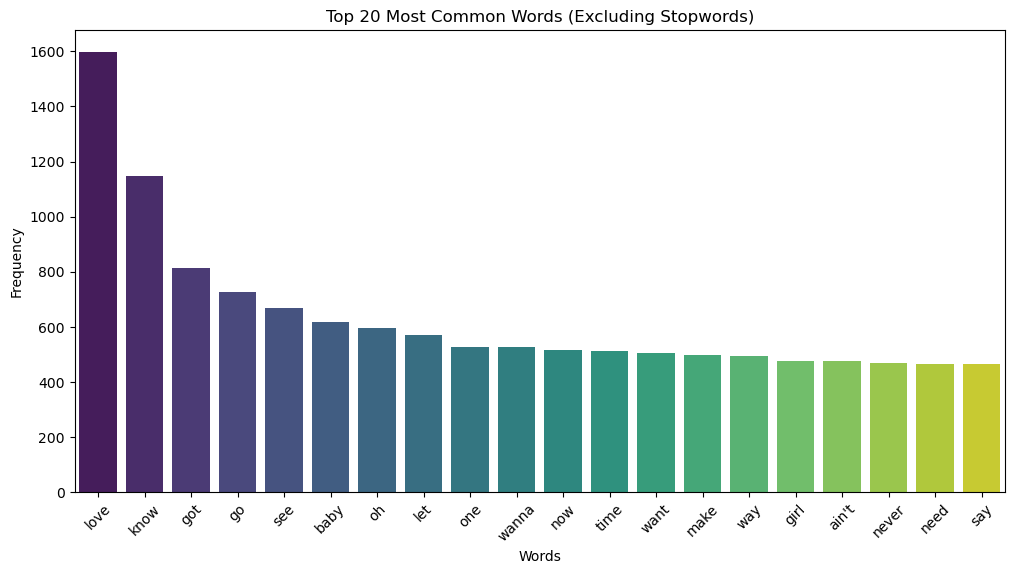

In [53]:
all_lyrics = ' '.join(df['Lyric'])

# Define a set of stopwords (you can add more words to this set if needed)
stopwords = set(STOPWORDS)

# Tokenize the lyrics and count the frequency of each word, excluding stopwords
words = [word for word in all_lyrics.split() if word.lower() not in stopwords]
word_freq = Counter(words)

# Get the most common words, excluding stopwords
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

# Plot the frequency distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words (Excluding Stopwords)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()